In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Data

In [2]:
data = pd.read_csv('Facebook_Ads_2.csv', encoding = "ISO-8859-1")
data.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [3]:
data.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


In [4]:
# The dataset contains 499 rows of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
Names                 499 non-null object
emails                499 non-null object
Country               499 non-null object
Time Spent on Site    499 non-null float64
Salary                499 non-null float64
Clicked               499 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [5]:
data.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [6]:
data.shape 

(499, 6)

In [7]:
# Three features are of type object
data.dtypes

Names                  object
emails                 object
Country                object
Time Spent on Site    float64
Salary                float64
Clicked                 int64
dtype: object

In [8]:
# How many countries are there?
# There are 210 different countries...
# Encoding the Country feature can be done... but i don't see a point here
len(data['Country'].unique())

210

In [9]:
ads_clicked = data[data['Clicked'] == 1]
ads_not_clicked = data[data['Clicked'] == 0]

In [10]:
# Seems like a balanced dataset
print(f'Ads clicked: {len(ads_clicked)}')
print(f'Ads not clicked: {len(ads_not_clicked)}')
print(f'Ads clicked percentage: {len(ads_clicked) / len(data) * 100:.2f}%')
print(f'Ads not clicked percentage: {len(ads_not_clicked) / len(data) * 100:.2f}%')

Ads clicked: 250
Ads not clicked: 249
Ads clicked percentage: 50.10%
Ads not clicked percentage: 49.90%


In [11]:
# Check for nulls 
# No missing data
data.isna().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

### Data Visualisation

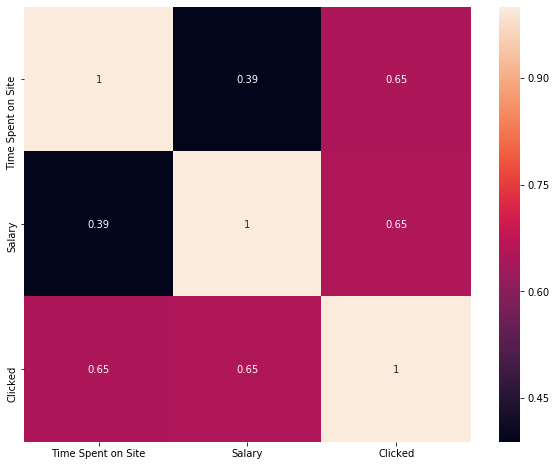

In [12]:
# Let's check which features are highly correlated to the 'Clicked' feature
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [13]:
# Time Spent on Site and Salary are highly correlated
# with the target feature
data.corr()['Clicked']

Time Spent on Site    0.650781
Salary                0.654654
Clicked               1.000000
Name: Clicked, dtype: float64

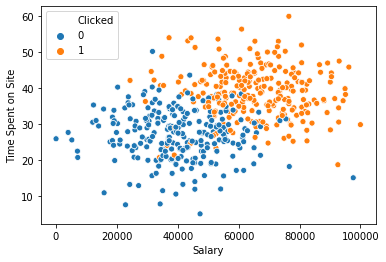

In [14]:
# Interesting scatterplot...
# The higher the salary, the higher the time spent on site
# therefore, the more the chance of clicking the ads on site
sns.scatterplot('Salary', 'Time Spent on Site', hue='Clicked', data=data)

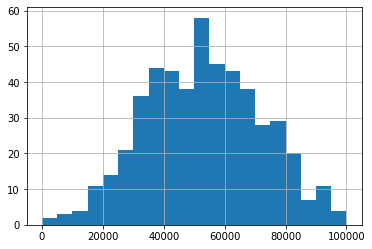

In [15]:
# Check the distribution salary of the people
# A lot of users have a salary of 50000
data['Salary'].hist(bins=20)

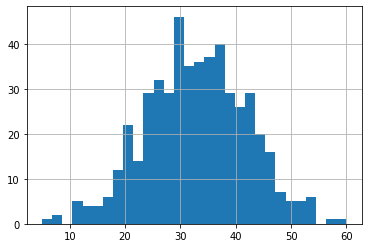

In [16]:
# A lot of users spend 30 hours on site
data['Time Spent on Site'].hist(bins=30)

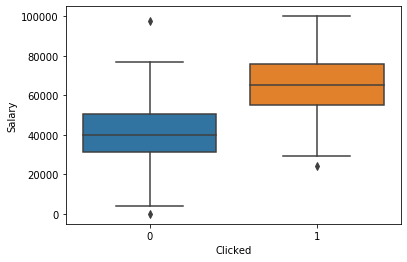

In [17]:
# The higher the salary, the higher the chance of clicking the ads on site
sns.boxplot('Clicked', 'Salary', data=data)

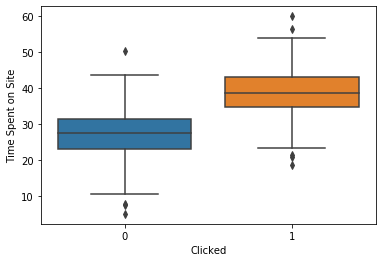

In [18]:
# On average, the users who clicked on ads spend about 40 hours on site 
sns.boxplot('Clicked', 'Time Spent on Site', data=data)

### Feature Engineering

In [19]:
data.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [20]:
# Let's remove the useless features that will not help us to predict the target feature
data.drop(['Names', 'emails', 'Country'], axis=1, inplace=True)
data.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


### Data Preparation and Training

In [21]:
# No categorical features here
# Split the data into training and testing

X = data.drop('Clicked', axis=1)
X

,Time Spent on Site,Salary
0,25.649648,55330.06006
1,32.456107,79049.07674
2,20.945978,41098.60826
3,54.039325,37143.35536
4,34.249729,37355.11276
...,...,...
494,19.222746,44969.13495
495,22.665662,41686.20425
496,35.320239,23989.80864
497,26.539170,31708.57054


In [22]:
y = data['Clicked']
y

0      0
1      1
2      0
3      1
4      0
      ..
494    0
495    0
496    0
497    0
498    1
Name: Clicked, Length: 499, dtype: int64

In [23]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((399, 2), (399,)), ((100, 2), (100,)))

In [24]:
# Scale the features to ensure they are on the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Instantiate the Logistic Regression model and train it
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_preds = classifier.predict(X_test)

C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(f'Accuracy score: {accuracy_score(y_test, y_preds)}')
print()
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_preds)}')
print()
print(f'Classification report: {classification_report(y_test, y_preds)}')

Accuracy score: 0.92

Confusion matrix:
 [[41  4]
 [ 4 51]]

Classification report:               precision    recall  f1-score   support

           0       0.91      0.91      0.91        45
           1       0.93      0.93      0.93        55

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



### Model Prediction

In [27]:
# Predict two data samples

# The following user spends 70 hours on average browsing the site, and has a salary of 100,000
# This is a user who WILL click on the ads
sample = scaler.transform([[70, 100000]])
classifier.predict(sample)

array([1], dtype=int64)

In [28]:
# The following user spends 20 hours on average browsing the site, and has a salary of 30,000
# This is a user who will NOT click on the ads
sample = scaler.transform([[20, 30000]])
classifier.predict(sample)

array([0], dtype=int64)

### Model Improvement 

In [29]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

y_preds = classifier.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(f'Accuracy score: {accuracy_score(y_test, y_preds)}')
print()
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_preds)}')
print()
print(f'Classification report: {classification_report(y_test, y_preds)}')

Accuracy score: 0.9

Confusion matrix:
 [[40  5]
 [ 5 50]]

Classification report:               precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.91      0.91      0.91        55

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



### Model Evaluation (More Depth)

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X, y, cv=10)
print(f'Classifier score: {np.mean(scores) * 100:.2f}%')

Classifier score: 89.38%


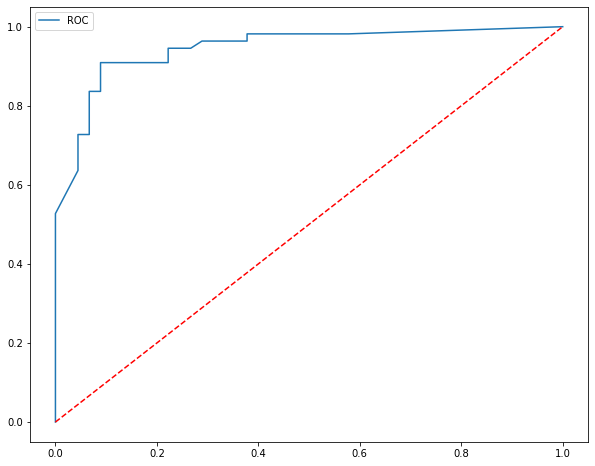

In [59]:
# Calculate the ROC and AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Predict the probabilities of the classes
y_probs = classifier.predict_proba(X_test)

# Only retain the positive rates
y_probs = y_probs[:, 1]
y_probs[:10]

# Calculate the fpr, tpr, and threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0,1], [0, 1], linestyle='--', c='r')
plt.legend(['ROC'])

In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds)

array([[40,  5],
       [ 5, 50]], dtype=int64)